<a href="https://colab.research.google.com/github/SAIKARTHIKLALAM/PlayStore-data-analysis/blob/main/Copy_of_EDA_PlayStoreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to the EDA Capstone Project 

Topic - Plastore Data and User Review Data Analysis

* To begin with we are importing all the required Libraries
* Then we are going to mount the drive and import both data files and store them as pandas dataframe in variable platstore_df and review_df


In [ ]:
#Importing all important libraries 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
#Uploading the directory and file as pandas dataframe

playstore_df = pd.read_csv('/content/Play Store Data.csv')
review_df = pd.read_csv('/content/User Reviews.csv')

#Let's analyse the data by checking out the head of both the data

In [ ]:
playstore_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# To proceed we have to first clean our data which we will do by analysing the unique data corresponding to each column and removing the unwanted data

- First check the list of columns and their types using info method and isnull method for Playstore Apps data 

In [ ]:
# Inspecting the dtypes of all the columns 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Inspecting the null value present in all the columns 
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- As we can see that the column name [Type, Content Rating, current Ver, Android Ver] have very few null values so first we will get rid of them. 

# Lets clean our first column 'Type'

In [ ]:
playstore_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

- As we can see that there is a unwanted value '0' so we will check how many rows has that value and then we will get rid of it 

In [ ]:
playstore_df[playstore_df['Type']== '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Though we can see at row index 10472, the type is '0' but when we analyse the data we found that from column 'Category' the data is wrongly put and the data should shift one column.
- So lets do the shifting of data 

In [ ]:
playstore_df.iloc[10472, 2:] = playstore_df.iloc[10472, 1: 12]

In [ ]:
playstore_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

- But we can see the value is column Category corresponding to row index 10472 is a missmatch, so we will exchange it with NaN 

In [ ]:
playstore_df['Category'].iloc[10472] = np.nan

In [ ]:
playstore_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

- Now we will get rid of the Nan by exchanging with the most common value

In [ ]:
playstore_df.groupby('Type').count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Type,,,,,,,,,,,,
Free,10040,10039,8720,10040,10040,10040,10040,10040,10039,10040,10034,10039
Paid,800,800,647,800,800,800,800,800,800,800,798,799


- As we can see that the number of Free values is very high, so we will convert the Nan with free 

In [ ]:
playstore_df['Type'].fillna('Free', inplace = True)

In [ ]:
playstore_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

# Now we repeat the above process on next column, 'Content Rating' 

In [ ]:
playstore_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
playstore_df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# So we can observe that due to our previous steps, the Null value in Content Rating is also corrected

# Now we will check the next column Genres

In [ ]:
playstore_df[playstore_df['Genres']== np.nan]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
playstore_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

- As we can see there is one Null value, so it is advisable to drop that row

In [ ]:
playstore_df.dropna(subset = ['Genres'], inplace = True)

In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

- So we can observe that we got rid of the Nan value in column Genres

# Now we will Analyse the current version column and Android version column

In [ ]:
playstore_df.dropna(subset = ['Current Ver'], inplace = True)

In [ ]:
playstore_df.dropna(subset = ['Android Ver'], inplace = True)

In [ ]:
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

# As we have got rid of the Null values in all dataset except Rating, so now analyse the data type of the remaining columns 

- We start with Category
- Then we will check the Rating column 
- Then we wil check Review
- Then we will analyse the size column 
- Then we will analyse the Installs column
- Then we wil analyse price column 
- Then we will analyse the Last Updated column

In [ ]:
playstore_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
playstore_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4.0, nan, 4.8, 4.9,
       3.6, 3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2], dtype=object)

- As we can see the data type as object, let us now change it to data type float using pd.to_numeric function
- Then we will find the mean of all the values of Rating and replace the NaN with mean value. 

In [ ]:
playstore_df['Rating'] = pd.to_numeric(playstore_df['Rating'], errors='coerce')
playstore_df['Rating'].dtype

dtype('float64')

In [ ]:
mean_value_rating = playstore_df['Rating'].mean().round(1)
playstore_df['Rating'].fillna(mean_value_rating, inplace = True)

In [ ]:
playstore_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
playstore_df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

- we again face the same problem with reviews, as the dtype is object, so we will change it to integer, using astype method 

In [ ]:
playstore_df['Reviews'] = playstore_df['Reviews'].astype('int64')
playstore_df['Reviews'].dtype

dtype('int64')

In [ ]:
#Repeating the above steps with size column, like changing the data type to float and removing unwanted values 
playstore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Replacing srting with NaN
playstore_df['Size'] = playstore_df.Size.replace("Varies with device",np.nan)

In [ ]:
#Droping the NaN value
playstore_df.dropna(subset = ['Size'], inplace = True)

In [ ]:
def size_change(sizevalue):
  '''This function will take the value as string and if at last 'M' is present 
  it will return a float value after multiplying by 1000 
  and if at last 'k' is present it will remove 'k' and return the remaining value as float'''
  sizevalue = str(sizevalue)
  if sizevalue[-1] == 'M':
    return float(sizevalue[:-1])*1000
  elif sizevalue[-1] == 'k':
    return float(sizevalue[:-1])

In [ ]:
#USing the above defined function to apply on the column 'Size'
playstore_df['Size'] = playstore_df.apply(lambda x: size_change(x['Size']), axis = 1)

In [ ]:
#COnverting the datatype to float
playstore_df['Size'] = playstore_df['Size'].astype(float)

In [ ]:
#Finally checking if all vaules are appropriate or not
playstore_df['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 5.50e+03, 1.70e+04, 3.90e+04, 3.10e+04,
       4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03, 4.60e+03,
       9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04, 9.40e+03, 1.50e+04,
       1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03, 7.90e+03, 5.60e+04,
       5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02, 3.60e+03, 5.70e+03,
       8.60e+03, 2.40e+03, 2.70e+04, 2.70e+03, 2.50e+03, 1.60e+04,
       3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04, 3.20e+04,
       5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03, 9.80e+03,
       5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03, 7.10e+03,
       3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03, 8.20e+03,
       9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03, 1.30e+04,
       7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03, 7.20e+03,
       2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e+04, 2.30e

In [ ]:
#Inspecting the unique values in Installs 
playstore_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)

- As we can see that the unique elements in installs column contain some unwanted data and also the dtype is object, so we will now try to recover this column.

In [ ]:
# Removing the commas present in values of Installs with empty string
playstore_df['Installs'] = playstore_df.Installs.str.replace(",","")
# Removing the + sign from the string
playstore_df['Installs'] = playstore_df.Installs.str.replace("+","")
# Converting the datatype from object to string
playstore_df['Installs'] = playstore_df['Installs'].astype(float)
playstore_df['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


dtype('float64')

In [ ]:
#Final checking of all the unique values of Installs
playstore_df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02, 1.e+01,
       1.e+00, 5.e+00, 1.e+09, 0.e+00])

In [ ]:
#Inspecting the unique values in Price 
playstore_df['Price'].unique()

array(['0', '$4.99', '$6.99', '$1.49', '$2.99', '$3.99', '$7.99', '$5.99',
       '$1.99', '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99',
       '$11.99', '$79.99', '$16.99', '$14.99', '$1.00', '$29.99',
       '$12.99', '$3.49', '$10.99', '$7.49', '$1.50', '$19.99', '$15.99',
       '$33.99', '$74.99', '$39.99', '$2.49', '$4.49', '$1.70', '$2.00',
       '$3.88', '$25.99', '$399.99', '$17.99', '$400.00', '$3.02',
       '$1.76', '$4.84', '$4.77', '$1.61', '$1.59', '$6.49', '$1.29',
       '$5.00', '$13.99', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85', '$46.99',
       '$109.99', '$154.99', '$3.08', '$2.59', '$4.80', '$8.99', '$1.96',
       '$19.40', '$15.46', '$3.04', '$4.29', '$2.60', '$3.28', '$4.60',
       '$28.99', '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99',
       '$3.61', '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Replacing the Dollar sign with empty string and also changing the data type to float
playstore_df['Price'] = playstore_df.Price.str.replace("$","").astype(float)
playstore_df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [ ]:
#Final checking of all the unique values in price 
playstore_df['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [ ]:
#Inspecting the values in column Last Updated
playstore_df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

- As we can see that it is a datetime column so we will correct the format and change the dtype to datetime

In [ ]:
# Changing the data type to datetime
playstore_df['Last Updated'] = pd.to_datetime(playstore_df['Last Updated'])

In [ ]:
# Checking the changes in Last Updated column
playstore_df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

# As we have completed the analysing of Playstore Data, now we will do the analysis and cleaning of User Review data

In [ ]:
# Checking the list of columns in user review data
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17155 entries, 0 to 17154
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     17155 non-null  object 
 1   Translated_Review       10945 non-null  object 
 2   Sentiment               10946 non-null  object 
 3   Sentiment_Polarity      10946 non-null  float64
 4   Sentiment_Subjectivity  10946 non-null  float64
dtypes: float64(2), object(3)
memory usage: 670.2+ KB


In [ ]:
review_df.shape

(17155, 5)

# Thus we can observe that there are no Null value in App column but rest all have too many null values and droping them is not a good option 

- So let us analyse all columns one by one and clean the data 

In [ ]:
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
# Since the number of NaN is huge and in most cases the NaN is common accross all the columns, except App, so we are going to drop the NaN data
review_df.dropna(inplace = True)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10944 entries, 0 to 17153
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     10944 non-null  object 
 1   Translated_Review       10944 non-null  object 
 2   Sentiment               10944 non-null  object 
 3   Sentiment_Polarity      10944 non-null  float64
 4   Sentiment_Subjectivity  10944 non-null  float64
dtypes: float64(2), object(3)
memory usage: 513.0+ KB


- By comparing the info value before and after using dropna, we can see that there is not much difference in the list of values in all columns, showing that NaN was common in all the other columns, except App, so it is an appropriate method to remove the NaN 

- Now we will check the data of each column one by one 
- we are not going to check the values in Translated Reviews as it is a string value and doesn't give any scope to comapre the data


In [ ]:
# Inspecting the unique values of Sentiment
review_df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [ ]:
# Inspecting the unique values of Sentiment_Polarity
review_df['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,  0.4       , ...,  0.16944444,
        0.26319444, -0.071875  ])

In [ ]:
# Inspecting the unique values of Sentiment_Subjectivity
review_df['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154, 0.875     , ..., 0.30666667, 0.54133333,
       0.35416667])

In [ ]:
review_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,10944.000000,10944.000000
mean,0.172204,0.487678
std,0.359137,0.265319
min,-1.000000,0.000000
25%,0.000000,0.340000
50%,0.136364,0.512500
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
review_df.groupby('Sentiment')['Sentiment_Polarity'].count().reset_index()

,Sentiment,Sentiment_Polarity
0,Negative,2569
1,Neutral,1637
2,Positive,6738


In [ ]:
category_list = list(playstore_df['Category'].unique())
category_review = []
for i in category_list:
  x = playstore_df[playstore_df['Category'] == i]
  if(len(x)!=0):
    review = sum(x.Reviews)/len(x)
    category_review.append(review)
  else:
    review = sum(x.Reviews)
    category_review.append(review)

In [ ]:
group_review = playstore_df.groupby('Category')['Reviews'].mean()

In [ ]:
group_review

Category
ART_AND_DESIGN         1.782439e+04
AUTO_AND_VEHICLES      1.323096e+04
BEAUTY                 3.975660e+03
BOOKS_AND_REFERENCE    2.068582e+04
BUSINESS               1.536240e+04
COMICS                 1.208224e+04
COMMUNICATION          4.419043e+05
DATING                 1.839861e+04
EDUCATION              6.377884e+04
ENTERTAINMENT          1.621530e+05
EVENTS                 2.221912e+03
FAMILY                 1.591540e+05
FINANCE                3.381877e+04
FOOD_AND_DRINK         4.287507e+04
GAME                   1.330281e+06
HEALTH_AND_FITNESS     3.817291e+04
HOUSE_AND_HOME         2.418441e+04
LIBRARIES_AND_DEMO     1.233731e+04
LIFESTYLE              2.523556e+04
MAPS_AND_NAVIGATION    3.394591e+04
MEDICAL                3.279832e+03
NEWS_AND_MAGAZINES     4.559378e+04
PARENTING              1.638333e+04
PERSONALIZATION        9.901074e+04
PHOTOGRAPHY            3.029269e+05
PRODUCTIVITY           1.438466e+05
SHOPPING               2.337216e+05
SOCIAL             

In [ ]:
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})

In [ ]:
data_category_reviews

,category,review
0,ART_AND_DESIGN,1.782439e+04
1,AUTO_AND_VEHICLES,1.323096e+04
2,BEAUTY,3.975660e+03
3,BOOKS_AND_REFERENCE,2.068582e+04
4,BUSINESS,1.536240e+04
5,COMICS,1.208224e+04
6,COMMUNICATION,4.419043e+05
7,DATING,1.839861e+04
8,EDUCATION,6.377884e+04
9,ENTERTAINMENT,1.621530e+05


In [ ]:
sorted_data = data_category_reviews.sort_values('review', ascending = False, ignore_index=True)

In [ ]:
sorted_data

,category,review
0,GAME,1.330281e+06
1,COMMUNICATION,4.419043e+05
2,PHOTOGRAPHY,3.029269e+05
3,SHOPPING,2.337216e+05
4,VIDEO_PLAYERS,1.836710e+05
5,SPORTS,1.690429e+05
6,ENTERTAINMENT,1.621530e+05
7,FAMILY,1.591540e+05
8,SOCIAL,1.543188e+05
9,PRODUCTIVITY,1.438466e+05


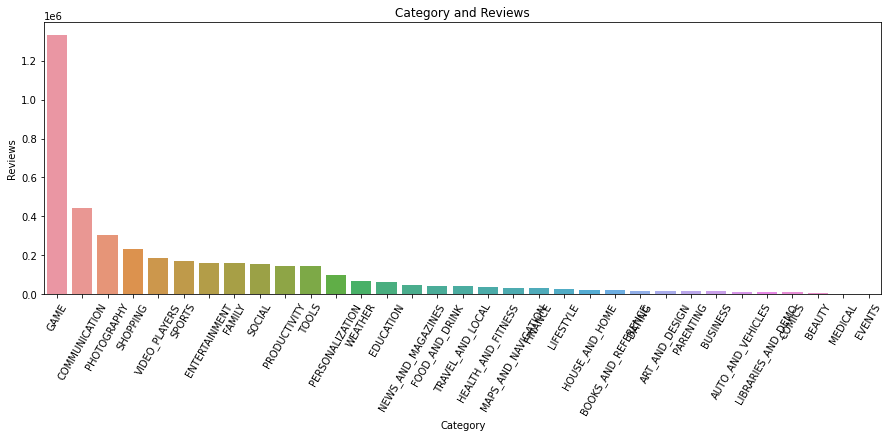

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

In [ ]:
playstore_df['Price'].unique()

array([  0.  ,   4.99,   6.99,   1.49,   2.99,   3.99,   7.99,   5.99,
         1.99,   9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,
        79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,   3.49,  10.99,
         7.49,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   2.49,
         4.49,   1.7 ,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   1.59,   6.49,   1.29,
         5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,  19.9 ,
         8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,   3.08,
         2.59,   4.8 ,   8.99,   1.96,  19.4 ,  15.46,   3.04,   4.29,
         2.6 ,   3.28,   4.6 ,  28.99,   2.9 ,   1.97, 200.  ,  89.99,
         2.56,  30.99,   3.61, 394.99,   1.26,   1.2 ,   1.04])

In [ ]:
paid_apps = playstore_df[playstore_df['Type']=='Paid']

In [ ]:
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200.0,1000.0,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.2,17,157.0,100.0,Paid,0.99,Mature 17+,Entertainment,2015-11-25,1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000.0,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000.0,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9500.0,10000.0,Paid,1.20,Everyone,Puzzle,2018-06-05,2.7,2.3 and up


In [ ]:
paid_apps.shape

(721, 13)

In [ ]:
group_review = playstore_df.groupby('Category')['Reviews'].mean()